In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Loading the data:

In [3]:
train_data = np.load("./logisticRegression_data/train_data.npy")
train_labels = np.load("./logisticRegression_data/train_labels.npy")

test_data = np.load("./logisticRegression_data/test_data.npy")
test_labels = np.load("./logisticRegression_data/test_labels.npy")

Data shapes and label types

In [4]:
train_data.shape, train_labels.shape

((1561, 256), (1561,))

In [32]:
train_data.max(axis=1).max() , train_data.min(axis = 1).min()

(1.0, -1.0)

In [5]:
train_labels

array([ 1,  1,  1, ..., -1, -1, -1])

Visualize random samples to have an idea about the input types.
The data is given in flatten form, but it is possible to reconstruct images using reshape function of numpy.

In [22]:
train_images = train_data.reshape(train_data.shape[0], 16, 16)
test_images = train_data.reshape(train_data.shape[0], 16, 16)

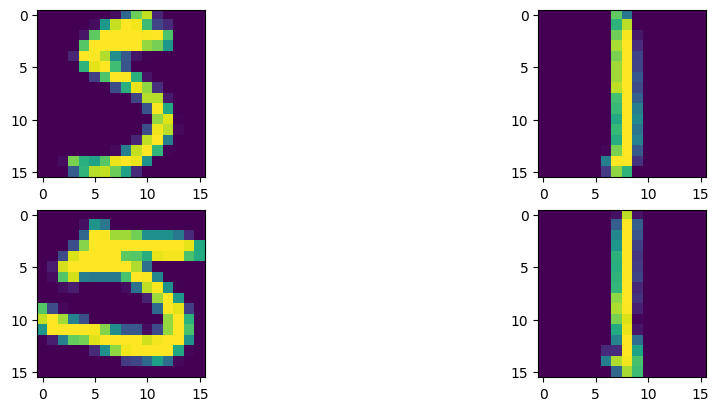

In [7]:
fig = plt.figure(layout='constrained', figsize=(10, 4))

fig.add_subplot(2,2,1)

plt.imshow( train_images[-1].reshape(16,16))
fig.add_subplot(2,2,2)
plt.imshow( train_images[0].reshape(16,16))
fig.add_subplot(2,2,3)

plt.imshow( train_images[-2].reshape(16,16))
fig.add_subplot(2,2,4)
plt.imshow( train_images[1].reshape(16,16))
plt.show()

### Extracting Symetry

To extract the symetry feature of an image, choosing a symetry axis is required. This case, horizontal line between 8th and 9th rows in the image matrix is used.

For 16x16 matrice $x$, smymetry function is calculated as:

$
symmetry(x) *= \sum_{r = 0}^{7}\sum_{c = 0}^{15} |x_{(r,c)} - x_{(r+8,c)}|
$

where $x_{(r,c)}$ indicates the pixel value at row $r$ and column $c$

In [44]:
symmetry = ((train_images[:,:8] - train_images[:,8:])**2).sum(axis = -1).sum(axis = -1)

## Extracting Intensity

Intensity of a image is defined as mean value of all pixels in the image.

In [46]:
intensity = ((train_images +1)/2).mean(axis=-1).mean(axis = -1)

To see how well these values classify an image, a scatter plot will be useful:

In [47]:
labels = []
for label in train_labels:
    if label == 1:
        labels.append("1")
    else:
        labels.append("5")
fig = px.scatter(x=symmetry, y=intensity, color = labels, labels={"x" :"symmetry", "y" : "intensity"})
fig.show()